In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
#import the required packages here
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import KFold
import graphviz
import matplotlib.pyplot as plt

In [2]:
#read the data contained in the file
df=pd.read_csv('https://raw.githubusercontent.com/chaitanyabaranwal/ParkinsonAnalysis/master/parkinsons.csv')
df.head(6) #parameter in the head function is the number of rows you want to obtain

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,1


In [4]:
df.shape

(195, 24)

In [3]:
#now we want the features (all columns except status) and labels(status)
features=df.loc[:, df.columns!='status'].values[:, 1:]
labels=df.loc[:, 'status'].values

In [4]:
#to get count of labels
print('count of 1\'s:', labels[labels==1].shape[0])
print('count of 0\'s:', labels[labels==0].shape[0])

count of 1's: 147
count of 0's: 48


In [5]:
#now to scale the features between -1 and 1, we use MinMaxScaler (for plotting)
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [29]:
#now split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7) 


# XGBoost Classifier

In [30]:
#now to train the model
model=XGBClassifier()

#extreme gradient boosting -> uses xtreme gradient algorithm -> a decision tree based ML algo for regression classification problems
model.fit(x_train, y_train)

[12:19:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/aishnarw/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [9]:
conda install python-graphviz

Solving environment: / ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


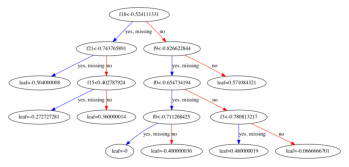

In [32]:
plot_tree(model)
plt.show()

In [33]:
#check for model's accuracy
y_pred=model.predict(x_test)

#print the y_pred and then we check for accuracy
print(accuracy_score(y_test, y_pred)*100, "%")

94.87179487179486 %


In [11]:
pd.DataFrame(
confusion_matrix(y_test, y_pred),
columns=['Predicted Healthy', 'Predicted Parkinsons'],
index=['True Healthy', 'True Parkinsons']
)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.97      0.97      0.97        32

    accuracy                           0.95        39
   macro avg       0.91      0.91      0.91        39
weighted avg       0.95      0.95      0.95        39



# SVM

In [12]:


k=10

kf = KFold(n_splits=k, random_state=None)
model = svm.SVC(kernel='linear')
acc_score=[]

In [13]:
model.fit(x_train, y_train)
pred_values = model.predict(x_test)

In [14]:
accuracy = accuracy_score(pred_values, y_test)
acc_score.append(accuracy)

avg_acc_score = sum(acc_score)/k

print("Accuracy of each fold - {}". format(acc_score))

Accuracy of each fold - [0.8974358974358975]


In [15]:
print("Average accuracy - {}". format(avg_acc_score))

Average accuracy - 0.08974358974358974


In [17]:
pd.DataFrame(
confusion_matrix(y_test, y_pred),
columns=['Predicted Healthy', 'Predicted Parkinsons'],
index=['True Healthy', 'True Parkinsons']
)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.97      0.97      0.97        32

    accuracy                           0.95        39
   macro avg       0.91      0.91      0.91        39
weighted avg       0.95      0.95      0.95        39



# KNN - K Nearest Neighbours

In [18]:
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
variance = pca.explained_variance_ratio_

classifi = KNeighborsClassifier(n_neighbors = 8,p=2,metric ='minkowski')
classifi.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=8)

In [19]:
y_pred = classifi.predict(x_test)

In [20]:
#KNN model
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.8974358974358975

In [22]:
pd.DataFrame(
confusion_matrix(y_test, y_pred),
columns=['Predicted Healthy', 'Predicted Parkinsons'],
index=['True Healthy', 'True Parkinsons']
)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39



# Random Forest

In [23]:
X = df.drop('status', axis=1)
X = X.drop('name', axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [24]:
random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)

In [25]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=1)

In [26]:
y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)

0.9387755102040817

In [27]:
pd.DataFrame(
confusion_matrix(y_test, y_predict),
columns=['Predicted Healthy', 'Predicted Parkinsons'],
index=['True Healthy', 'True Parkinsons']
)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.97      0.95      0.96        37

    accuracy                           0.94        49
   macro avg       0.91      0.93      0.92        49
weighted avg       0.94      0.94      0.94        49



In [ ]:
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5434464/

In [ ]:
#https://www.analyticsvidhya.com/blog/2021/07/parkinson-disease-onset-detection-using-machine-learning/